**FINANCIAL NEWS SENTIMENT ANALYZER:**

About dataset:

1) Combined_News_DJIA.csv
Purpose: News headlines corresponding to each trading day.

Columns:

Date: The date of the news.

Label: Binary indicator:

1 if DJIA rose or stayed the same

0 if DJIA decreased

Top1 to Top25: Top 25 news headlines for that day.

2) upload_DJIA_TALE.csv
Purpose: Actual stock market data (DJIA) from 2008-08-08 to 2016-07-01.

Columns:

Date, Open, High, Low, Close, Volume, Adj Volume

DATA PREPROCESSING:

In [1]:
# Import library:

import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the data 1:
df1=pd.read_csv('/content/Combined_News_DJIA.csv')
df1.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
#load the data2:

df2= pd.read_csv('/content/upload_DJIA_table.csv')
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
df1.shape,df2.shape

((1989, 27), (1989, 7))

Merging the datasets:

In [5]:
# Merge the data st on the date field:

merge= df1.merge(df2, how='inner', on='Date')
merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President

In [6]:
#Combine the top news headline:

headline= []

for row  in range (0, len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row, 2:27]))

In [7]:
# print a sample of combine headlines:

headline[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

DATA CLEANING:

In [8]:
# clean the data:
clean_headline = []

for i in range (0, len(headline)):
    clean_headline.append(re.sub("b[(')]", '', headline[i])) # remove b'
    clean_headline[i] = re.sub('b[(")]', '', clean_headline[i]) # remove b"
    clean_headline[i] = re.sub("\'", '', clean_headline[i]) # remove \'

In [9]:
clean_headline[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [10]:
# Add the clean headline to the merge data:

merge['Combined_News'] = clean_headline

merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African P

EDA ON SAMPLE DATA:

1) Basic Dataset Overview:

In [11]:
# Basic info
print(merge.info())

# Descriptive statistics
print(merge.describe())

# Check for missing values
print(merge.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1989 non-null   object 
 1   Label          1989 non-null   int64  
 2   Top1           1989 non-null   object 
 3   Top2           1989 non-null   object 
 4   Top3           1989 non-null   object 
 5   Top4           1989 non-null   object 
 6   Top5           1989 non-null   object 
 7   Top6           1989 non-null   object 
 8   Top7           1989 non-null   object 
 9   Top8           1989 non-null   object 
 10  Top9           1989 non-null   object 
 11  Top10          1989 non-null   object 
 12  Top11          1989 non-null   object 
 13  Top12          1989 non-null   object 
 14  Top13          1989 non-null   object 
 15  Top14          1989 non-null   object 
 16  Top15          1989 non-null   object 
 17  Top16          1989 non-null   object 
 18  Top17   

2)Label Distribution:

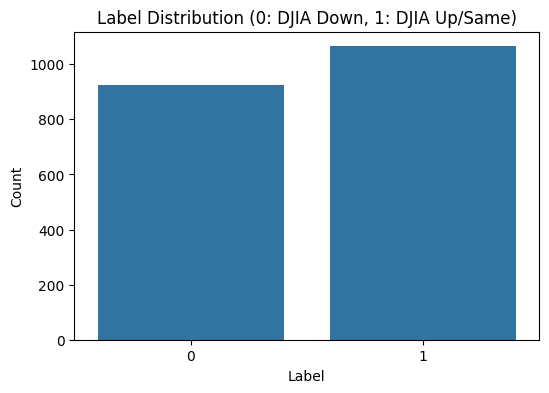

Label
1    53.544495
0    46.455505
Name: proportion, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=merge)
plt.title("Label Distribution (0: DJIA Down, 1: DJIA Up/Same)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Percentage of each label
label_counts = merge['Label'].value_counts(normalize=True) * 100
print(label_counts)


3) Distribution of DJIA Prices (from stock data)

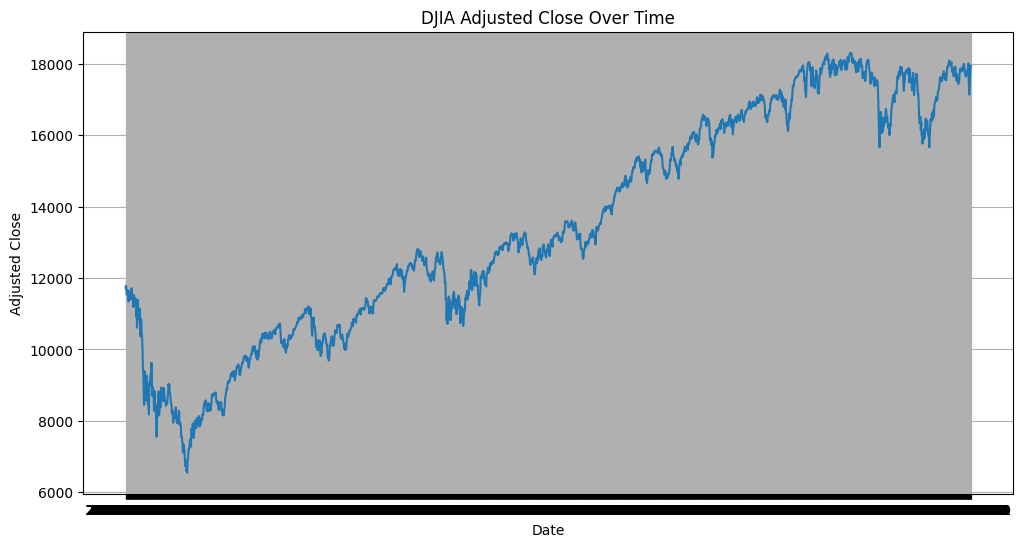

In [13]:
# Plot adjusted close over time
plt.figure(figsize=(12,6))
merge['Adj Close'] = merge['Adj Close'].astype(float)  # Ensure correct type
merge.sort_values('Date', inplace=True)
plt.plot(merge['Date'], merge['Adj Close'])
plt.title('DJIA Adjusted Close Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.grid(True)
plt.show()


4) Word Cloud for Positive vs. Negative News

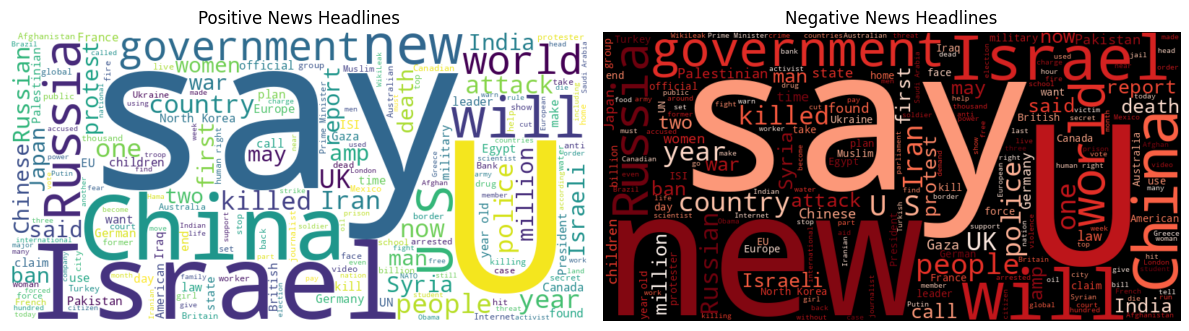

In [14]:
from wordcloud import WordCloud

# Separate positive and negative headlines
positive_news = merge[merge['Label'] == 1]['Combined_News'].str.cat(sep=" ")
negative_news = merge[merge['Label'] == 0]['Combined_News'].str.cat(sep=" ")

# Word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_news)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_news)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive News Headlines')

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative News Headlines')

plt.tight_layout()
plt.show()


In [15]:
# Sample 500 rows for faster EDA (or any N as per memory)
sample_df = merge.sample(n=500, random_state=42).copy()


5) Basic Article Stats: Word Count & Length

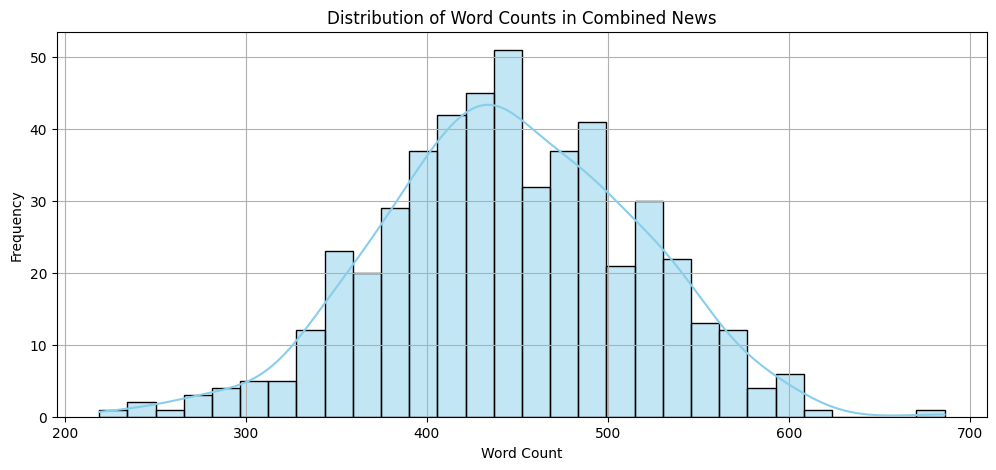

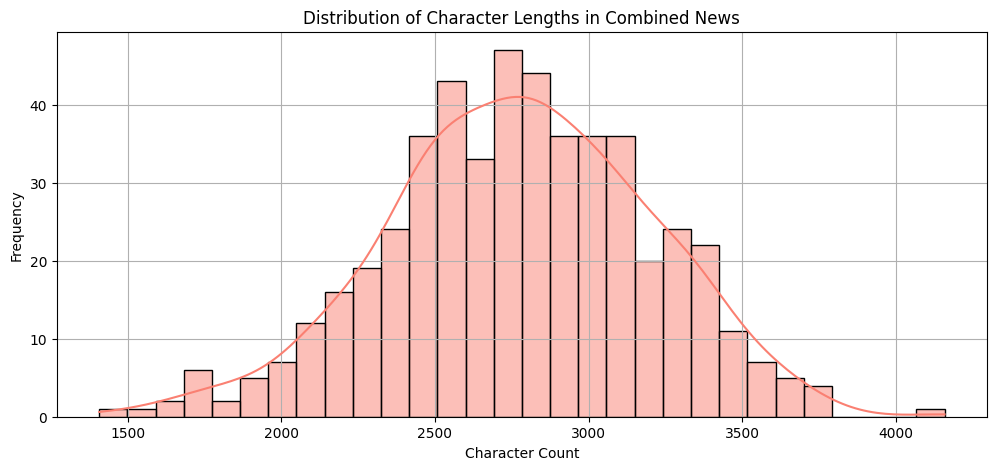

In [16]:
# Word count and character length
sample_df['News_Word_Count'] = sample_df['Combined_News'].apply(lambda x: len(x.split()))
sample_df['News_Char_Length'] = sample_df['Combined_News'].apply(len)

# Plot distributions
plt.figure(figsize=(12, 5))
sns.histplot(sample_df['News_Word_Count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in Combined News')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(sample_df['News_Char_Length'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Character Lengths in Combined News')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


6) Word Frequency Bar Chart

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-17-2939833471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


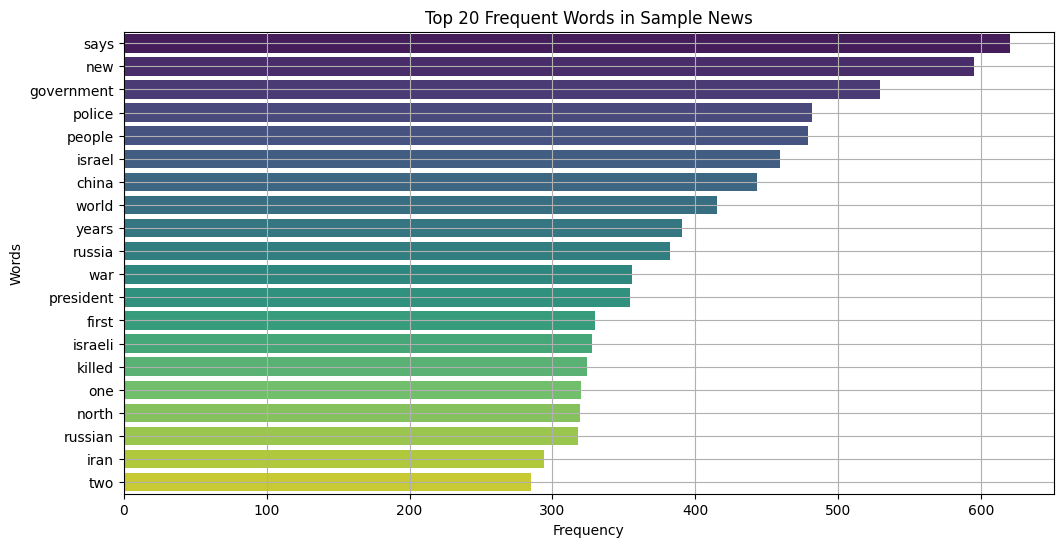

In [17]:
from collections import Counter
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Clean and tokenize
stop_words = set(stopwords.words('english'))
all_words = ' '.join(sample_df['Combined_News']).lower().translate(str.maketrans('', '', string.punctuation)).split()
filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]

# Count and plot top 20
word_freq = Counter(filtered_words).most_common(20)
words, freqs = zip(*word_freq)

plt.figure(figsize=(12,6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.title('Top 20 Frequent Words in Sample News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.grid(True)
plt.show()


7) Word Cloud of Sample News

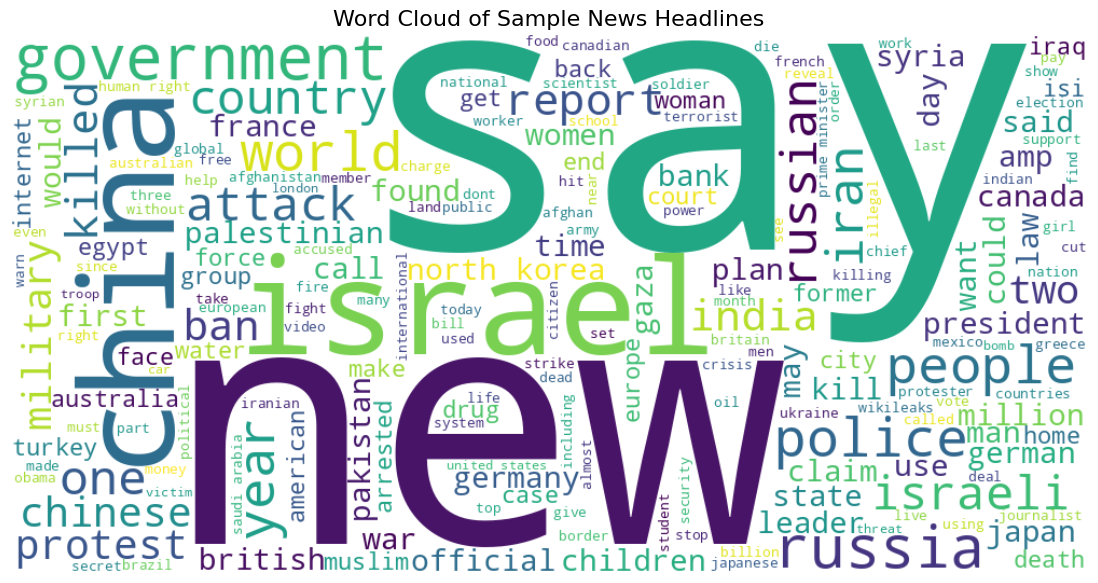

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=stop_words).generate(' '.join(filtered_words))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Sample News Headlines", fontsize=16)
plt.show()


VADER SENTIMENT ANALYSIS:

In [19]:
!pip install vaderSentiment

In [20]:
analyzer = SentimentIntensityAnalyzer()

# Create columns for sentiment scores
merge['Sentiment_Compound'] = merge['Combined_News'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
merge['Sentiment_Positive'] = merge['Combined_News'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
merge['Sentiment_Neutral'] = merge['Combined_News'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
merge['Sentiment_Negative'] = merge['Combined_News'].apply(lambda x: analyzer.polarity_scores(x)['neg'])

# Check sentiment stats
merge[['Sentiment_Compound', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']].describe()


,Sentiment_Compound,Sentiment_Positive,Sentiment_Neutral,Sentiment_Negative
count,1989.000000,1989.000000,1989.000000,1989.000000
mean,-0.957369,0.065675,0.772018,0.162315
std,0.199673,0.020968,0.041819,0.038575
min,-0.999500,0.007000,0.588000,0.059000
25%,-0.996400,0.051000,0.746000,0.135000
50%,-0.993200,0.064000,0.773000,0.159000
75%,-0.985500,0.079000,0.802000,0.188000
max,0.991700,0.153000,0.894000,0.316000


Correlation Heatmap:

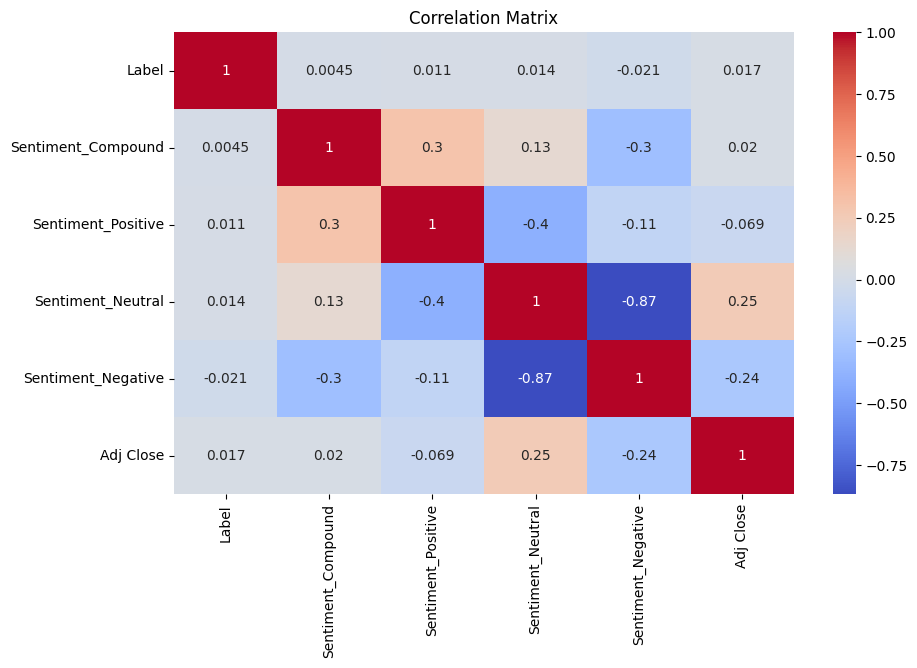

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(merge[['Label', 'Sentiment_Compound', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative', 'Adj Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Sentiment Distribution by Label:

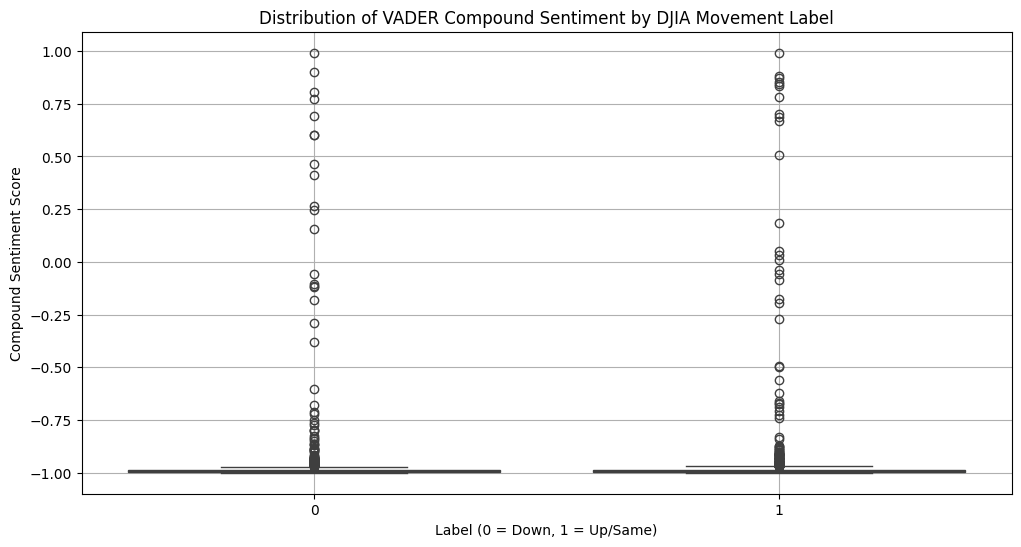

In [22]:
# Boxplots to compare sentiment distributions by label
plt.figure(figsize=(12,6))
sns.boxplot(x='Label', y='Sentiment_Compound', data=merge)
plt.title("Distribution of VADER Compound Sentiment by DJIA Movement Label")
plt.xlabel("Label (0 = Down, 1 = Up/Same)")
plt.ylabel("Compound Sentiment Score")
plt.grid(True)
plt.show()


Sentiment Trend Over Time:

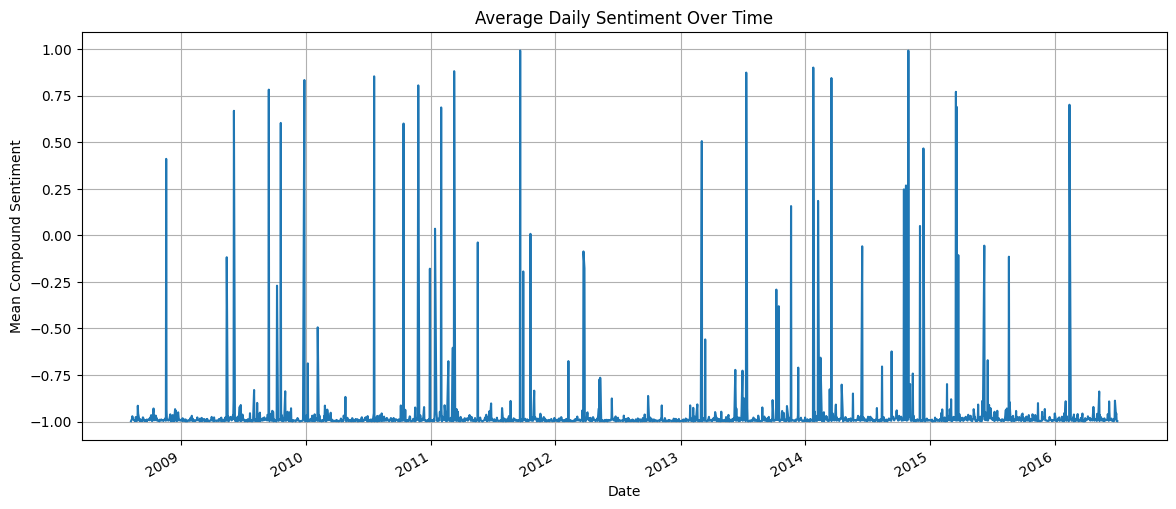

In [23]:
# Convert Date column to datetime if not already
merge['Date'] = pd.to_datetime(merge['Date'])

# Plot sentiment over time
plt.figure(figsize=(14,6))
merge.groupby('Date')['Sentiment_Compound'].mean().plot()
plt.title('Average Daily Sentiment Over Time')
plt.ylabel('Mean Compound Sentiment')
plt.xlabel('Date')
plt.grid(True)
plt.show()


Rolling Averages of Sentiment and DJIA Price:

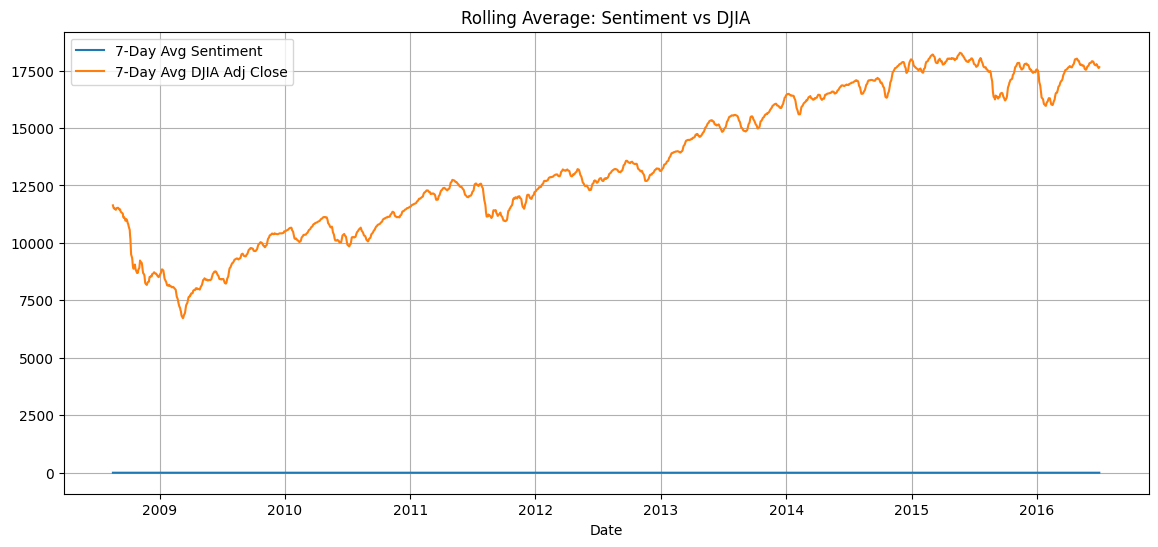

In [24]:
# Rolling average for sentiment and adj close
merge['Sentiment_Compound_Roll'] = merge['Sentiment_Compound'].rolling(window=7).mean()
merge['Adj_Close_Roll'] = merge['Adj Close'].rolling(window=7).mean()

# Plot together
plt.figure(figsize=(14,6))
plt.plot(merge['Date'], merge['Sentiment_Compound_Roll'], label='7-Day Avg Sentiment')
plt.plot(merge['Date'], merge['Adj_Close_Roll'], label='7-Day Avg DJIA Adj Close')
plt.legend()
plt.title('Rolling Average: Sentiment vs DJIA')
plt.xlabel('Date')
plt.grid(True)
plt.show()


SETIMENT ANALYSIS USING TEXTBLOB:

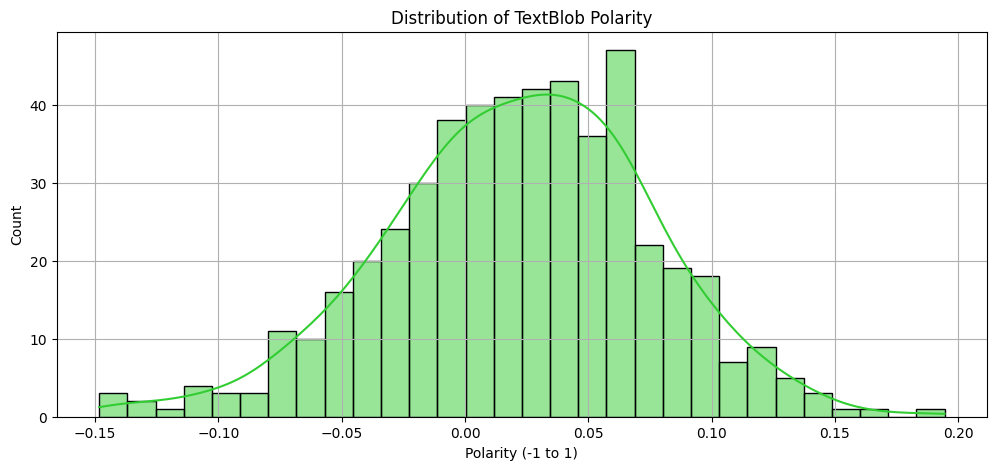

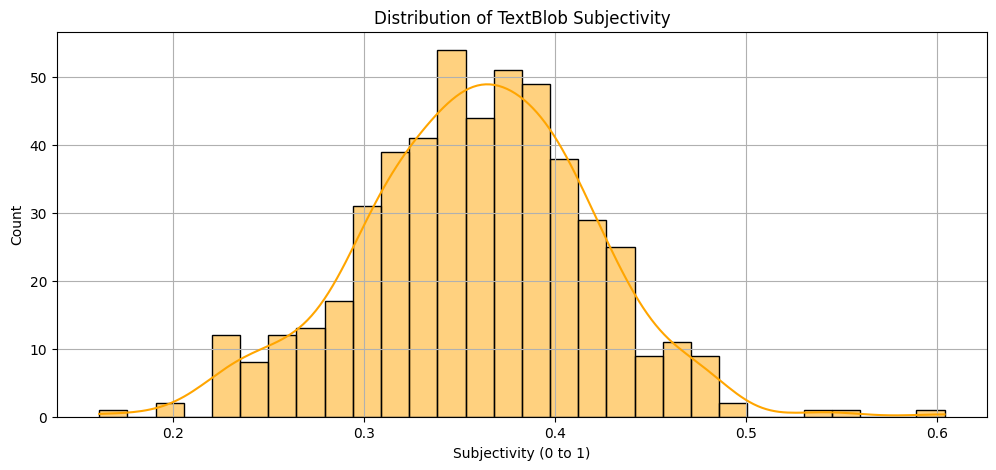

In [25]:
from textblob import TextBlob

# Apply TextBlob polarity and subjectivity
sample_df['Polarity'] = sample_df['Combined_News'].apply(lambda x: TextBlob(x).sentiment.polarity)
sample_df['Subjectivity'] = sample_df['Combined_News'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Histograms
plt.figure(figsize=(12,5))
sns.histplot(sample_df['Polarity'], bins=30, kde=True, color='limegreen')
plt.title('Distribution of TextBlob Polarity')
plt.xlabel('Polarity (-1 to 1)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(sample_df['Subjectivity'], bins=30, kde=True, color='orange')
plt.title('Distribution of TextBlob Subjectivity')
plt.xlabel('Subjectivity (0 to 1)')
plt.grid(True)
plt.show()


NAMED ENTITY RECOGNITION (NER) WITH SPACY:

/tmp/ipython-input-26-874515714.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(org_counts), y=list(org_names), palette='coolwarm')


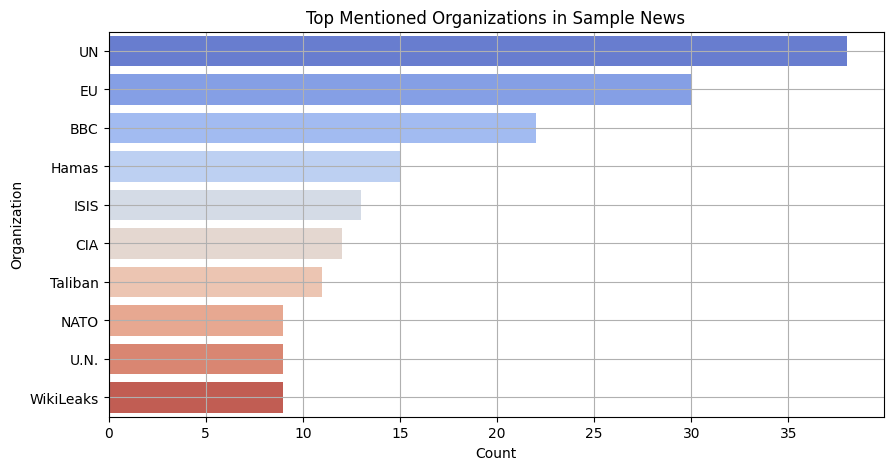

/tmp/ipython-input-26-874515714.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(person_counts), y=list(person_names), palette='magma')


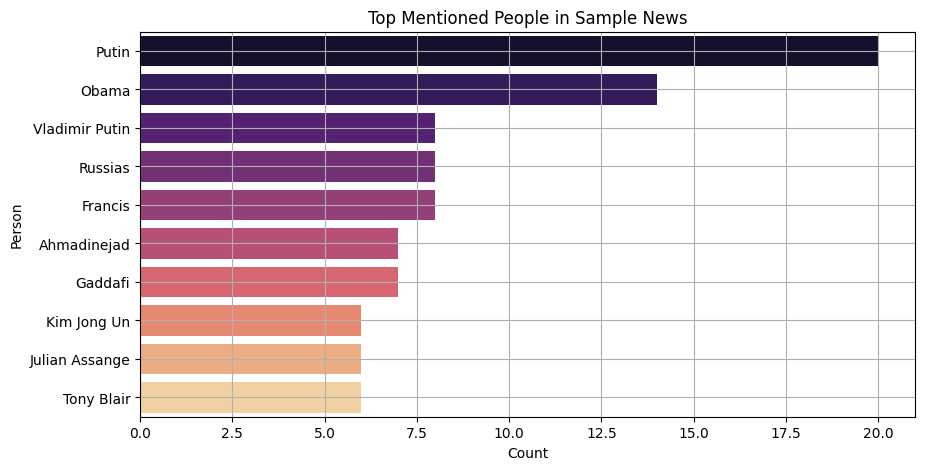

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Extract named entities (orgs & persons) from top 100 rows
entities = {'ORG': [], 'PERSON': []}

for text in sample_df['Combined_News'].head(100):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)

# Count top 10 organizations and persons
top_orgs = Counter(entities['ORG']).most_common(10)
top_persons = Counter(entities['PERSON']).most_common(10)

# Plot Organizations
org_names, org_counts = zip(*top_orgs)
plt.figure(figsize=(10,5))
sns.barplot(x=list(org_counts), y=list(org_names), palette='coolwarm')
plt.title("Top Mentioned Organizations in Sample News")
plt.xlabel("Count")
plt.ylabel("Organization")
plt.grid(True)
plt.show()

# Plot Persons
person_names, person_counts = zip(*top_persons)
plt.figure(figsize=(10,5))
sns.barplot(x=list(person_counts), y=list(person_names), palette='magma')
plt.title("Top Mentioned People in Sample News")
plt.xlabel("Count")
plt.ylabel("Person")
plt.grid(True)
plt.show()


N GRAM ANALYSIS:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Clean text: lowercase, remove punctuation & stopwords
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

merge['Cleaned_News'] = merge['Combined_News'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bigram (2-word phrases) Analysis

/tmp/ipython-input-28-3388224676.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='plasma')


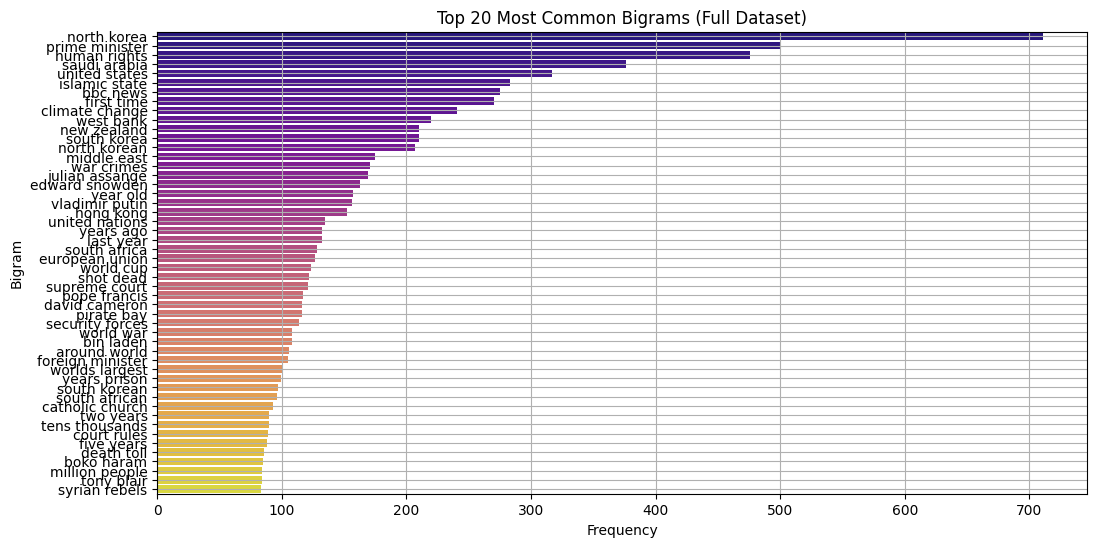

In [28]:
# Initialize bigram vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), max_features=50)
bigram_counts = bigram_vectorizer.fit_transform(merge['Cleaned_News'])

# Frequency summary
bigram_freq = bigram_counts.sum(axis=0).A1
bigram_words = bigram_vectorizer.get_feature_names_out()
bigram_df = pd.DataFrame({'Bigram': bigram_words, 'Frequency': bigram_freq})
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False)

# Plot bigrams
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='plasma')
plt.title('Top 20 Most Common Bigrams (Full Dataset)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.grid(True)
plt.show()


Trigram (3-word phrases) Analysis

/tmp/ipython-input-29-1985002748.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='inferno')


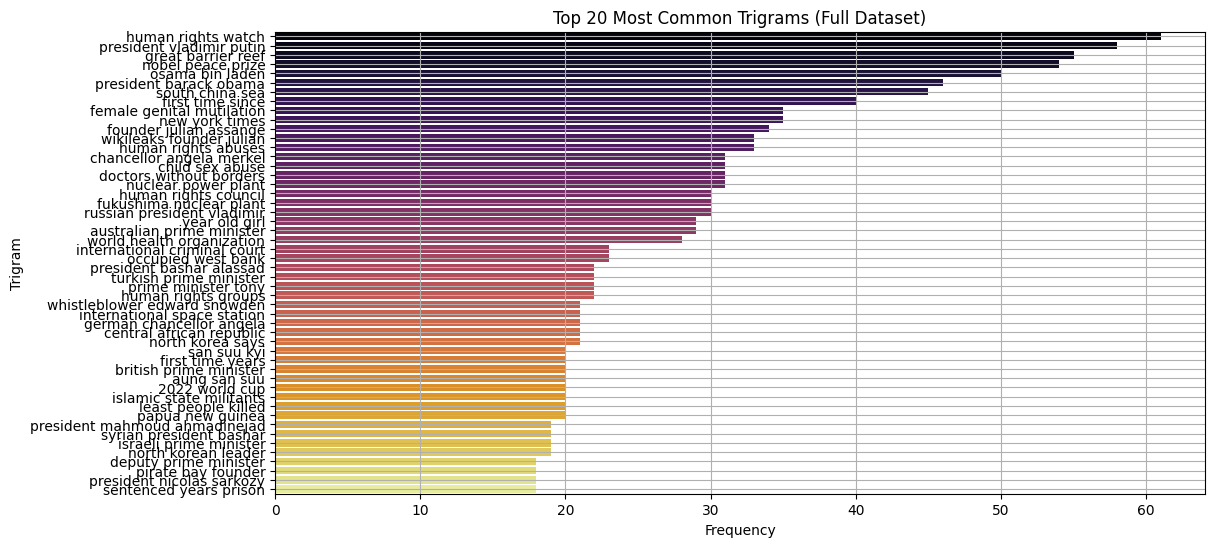

In [29]:
# Initialize trigram vectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(3,3), max_features=50)
trigram_counts = trigram_vectorizer.fit_transform(merge['Cleaned_News'])

# Frequency summary
trigram_freq = trigram_counts.sum(axis=0).A1
trigram_words = trigram_vectorizer.get_feature_names_out()
trigram_df = pd.DataFrame({'Trigram': trigram_words, 'Frequency': trigram_freq})
trigram_df = trigram_df.sort_values(by='Frequency', ascending=False)

# Plot trigrams
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='inferno')
plt.title('Top 20 Most Common Trigrams (Full Dataset)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.grid(True)
plt.show()


Compare n-grams for Label 1 vs Label 0 (up vs down market):

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean text function
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

# Cleaned news column
merge['Cleaned_News'] = merge['Combined_News'].apply(clean_text)

# Split data
df_up = merge[merge['Label'] == 1].copy()
df_down = merge[merge['Label'] == 0].copy()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def plot_ngrams(text_data, ngram_range=(2,2), top_n=20, label="Label"):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=100)
    ngram_counts = vec.fit_transform(text_data)
    ngram_freq = ngram_counts.sum(axis=0).A1
    ngram_words = vec.get_feature_names_out()

    ngram_df = pd.DataFrame({
        'N-gram': ngram_words,
        'Frequency': ngram_freq
    }).sort_values(by='Frequency', ascending=False).head(top_n)

    plt.figure(figsize=(12,6))
    sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='mako')
    title = f"Top {top_n} {ngram_range[0]}-grams for {label}"
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel(f'{ngram_range[0]}-gram')
    plt.grid(True)
    plt.show()


Plot Bigrams for Label 1 (Up) and Label 0 (Down)

/tmp/ipython-input-31-3167332584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='mako')


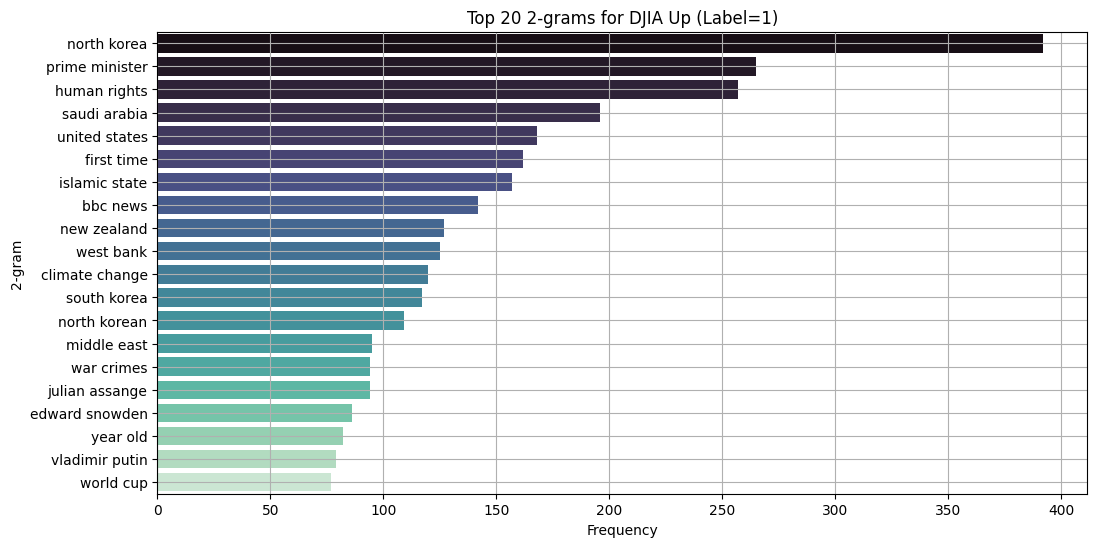

/tmp/ipython-input-31-3167332584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='mako')


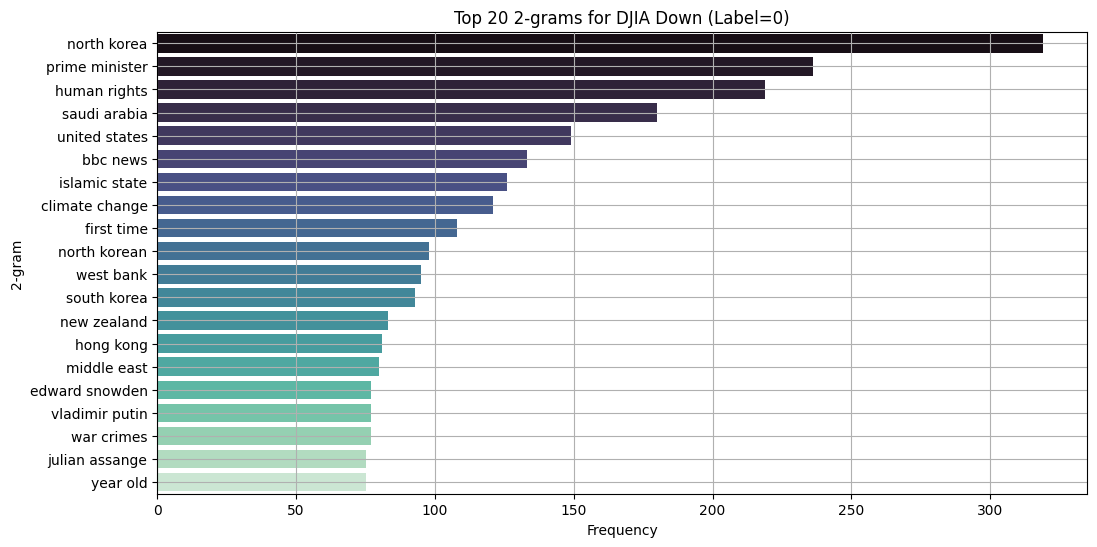

In [32]:
plot_ngrams(df_up['Cleaned_News'], ngram_range=(2,2), label="DJIA Up (Label=1)")
plot_ngrams(df_down['Cleaned_News'], ngram_range=(2,2), label="DJIA Down (Label=0)")


Plot Trigrams for Label 1 (Up) and Label 0 (Down)

/tmp/ipython-input-31-3167332584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='mako')


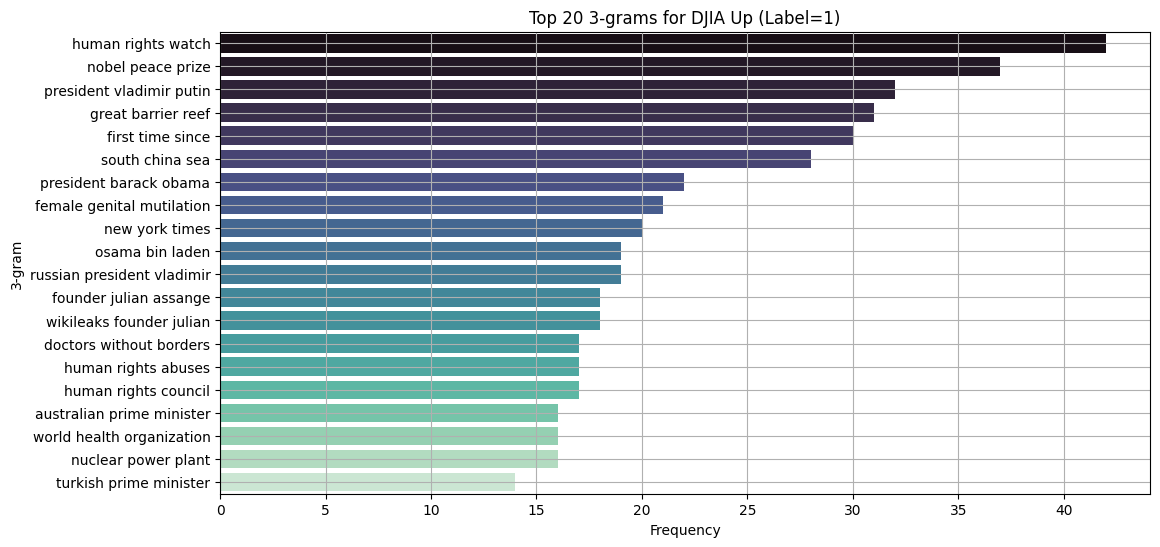

/tmp/ipython-input-31-3167332584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='mako')


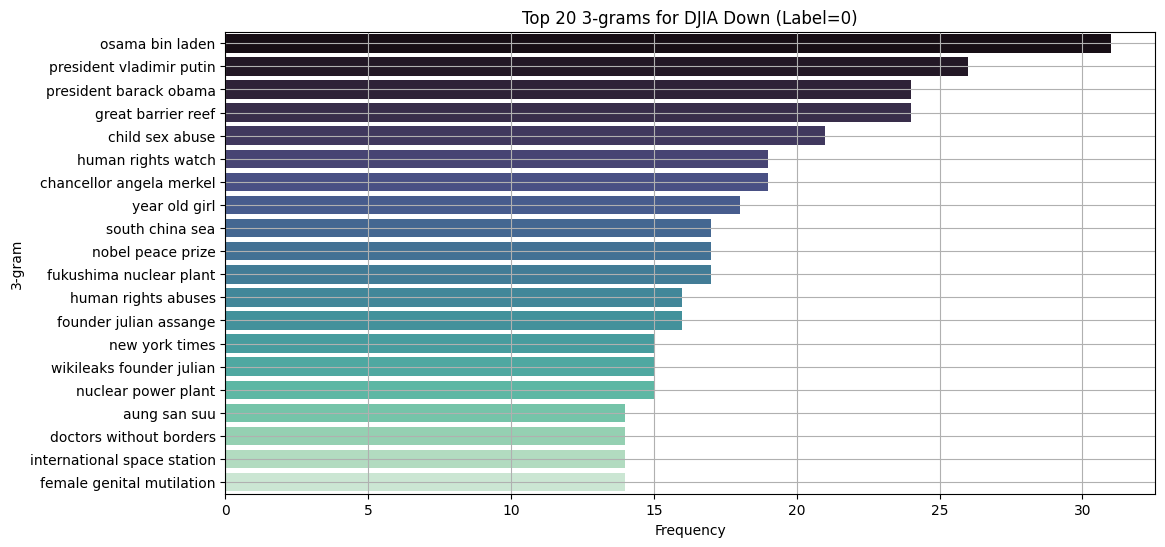

In [33]:
plot_ngrams(df_up['Cleaned_News'], ngram_range=(3,3), label="DJIA Up (Label=1)")
plot_ngrams(df_down['Cleaned_News'], ngram_range=(3,3), label="DJIA Down (Label=0)")


TF-IDF BASED N GRAM ANALYSIS:

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tfidf_unigrams(text_data, top_n=20, label="Label"):
    tfidf_vec = TfidfVectorizer(max_features=1000)  # default ngram_range=(1,1)
    tfidf_matrix = tfidf_vec.fit_transform(text_data)
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_terms = tfidf_vec.get_feature_names_out()

    tfidf_df = pd.DataFrame({
        'Term': tfidf_terms,
        'TF-IDF Score': tfidf_scores
    }).sort_values(by='TF-IDF Score', ascending=False).head(top_n)

    plt.figure(figsize=(12,6))
    sns.barplot(x='TF-IDF Score', y='Term', data=tfidf_df, palette='coolwarm')
    plt.title(f"Top {top_n} Unigrams by TF-IDF for {label}")
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.grid(True)
    plt.show()


TF-IDF with Unigrams (Label-wise)

/tmp/ipython-input-34-483284389.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Term', data=tfidf_df, palette='coolwarm')


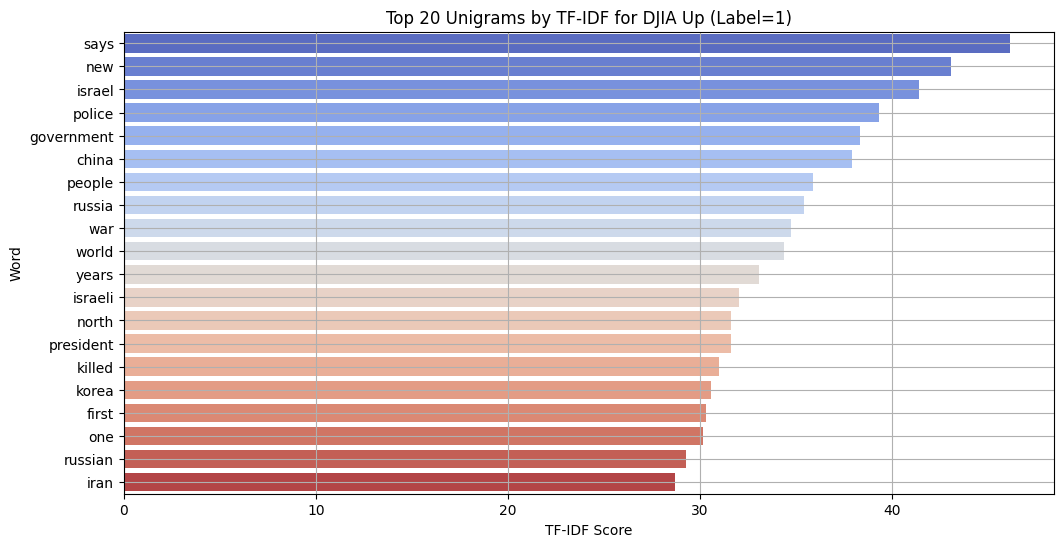

/tmp/ipython-input-34-483284389.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Term', data=tfidf_df, palette='coolwarm')


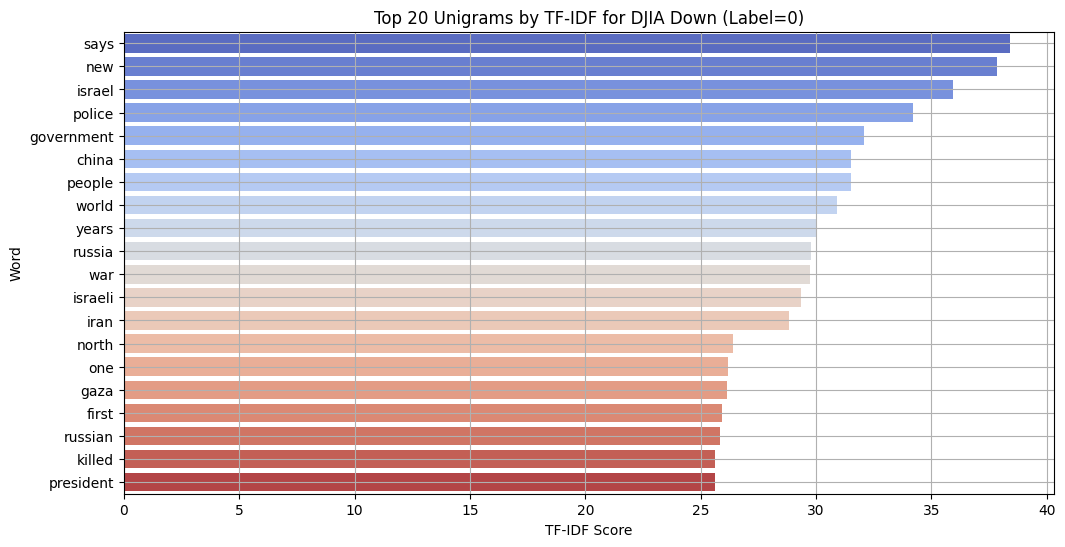

In [35]:
# For DJIA Up
plot_tfidf_unigrams(df_up['Cleaned_News'], top_n=20, label="DJIA Up (Label=1)")

# For DJIA Down
plot_tfidf_unigrams(df_down['Cleaned_News'], top_n=20, label="DJIA Down (Label=0)")


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_tfidf_ngrams(text_data, ngram_range=(2,2), top_n=20, label="Label"):
    tfidf_vec = TfidfVectorizer(ngram_range=ngram_range, max_features=500)
    tfidf_matrix = tfidf_vec.fit_transform(text_data)
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_terms = tfidf_vec.get_feature_names_out()

    tfidf_df = pd.DataFrame({
        'N-gram': tfidf_terms,
        'TF-IDF Score': tfidf_scores
    }).sort_values(by='TF-IDF Score', ascending=False).head(top_n)

    plt.figure(figsize=(12,6))
    sns.barplot(x='TF-IDF Score', y='N-gram', data=tfidf_df, palette='viridis')
    title = f"Top {top_n} {ngram_range[0]}-grams by TF-IDF for {label}"
    plt.title(title)
    plt.xlabel('TF-IDF Score')
    plt.ylabel(f'{ngram_range[0]}-gram')
    plt.grid(True)
    plt.show()


Apply TF-IDF for Bigrams (2-grams)

/tmp/ipython-input-36-4015799298.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='N-gram', data=tfidf_df, palette='viridis')


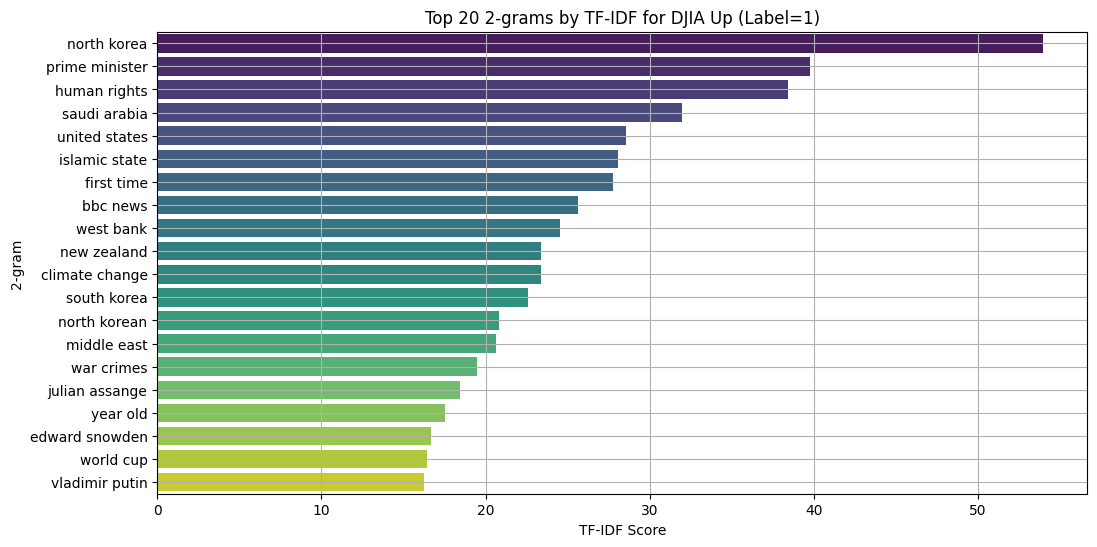

/tmp/ipython-input-36-4015799298.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='N-gram', data=tfidf_df, palette='viridis')


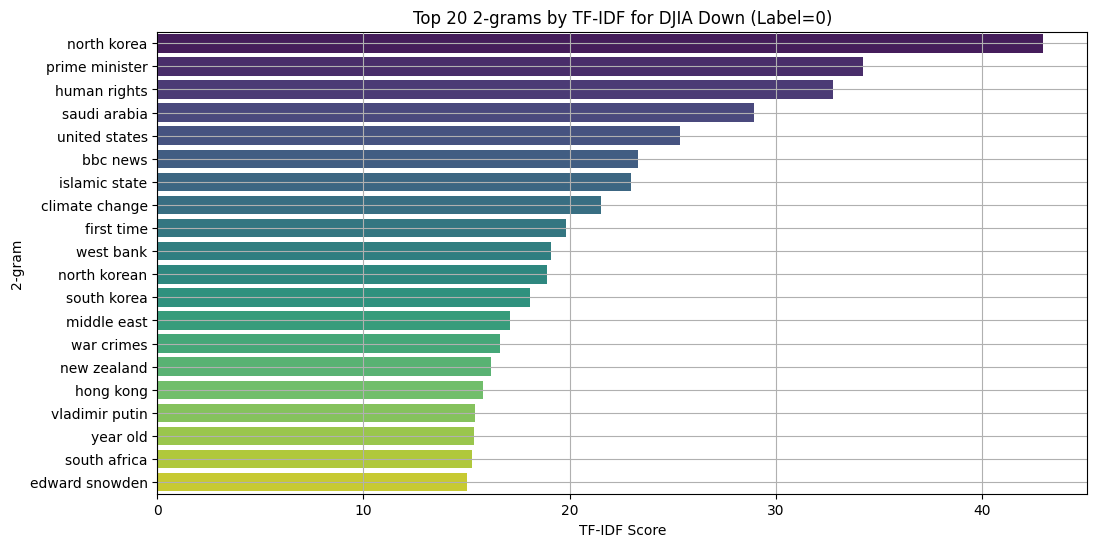

In [37]:
# Label = 1 (DJIA Up)
plot_tfidf_ngrams(df_up['Cleaned_News'], ngram_range=(2,2), top_n=20, label="DJIA Up (Label=1)")

# Label = 0 (DJIA Down)
plot_tfidf_ngrams(df_down['Cleaned_News'], ngram_range=(2,2), top_n=20, label="DJIA Down (Label=0)")


Apply TF-IDF for Trigrams (3-grams)

/tmp/ipython-input-36-4015799298.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='N-gram', data=tfidf_df, palette='viridis')


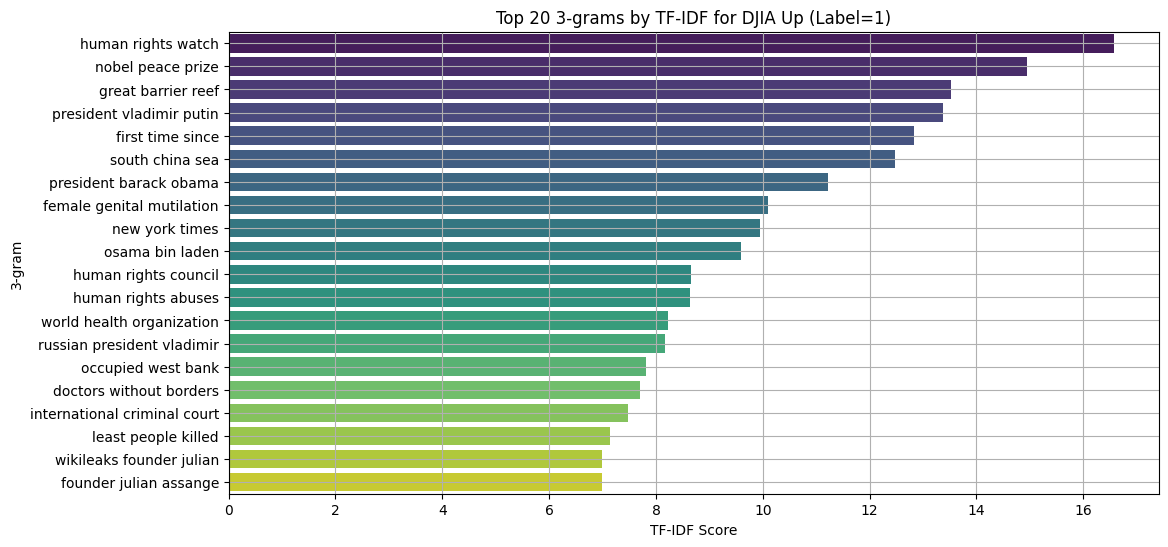

/tmp/ipython-input-36-4015799298.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='N-gram', data=tfidf_df, palette='viridis')


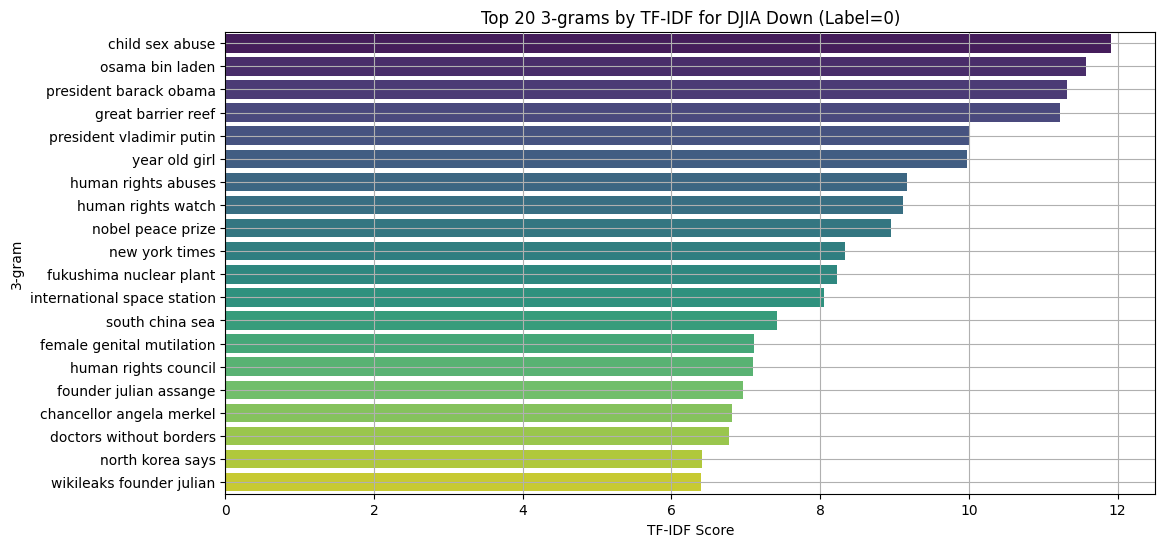

In [38]:
# Label = 1 (DJIA Up)
plot_tfidf_ngrams(df_up['Cleaned_News'], ngram_range=(3,3), top_n=20, label="DJIA Up (Label=1)")

# Label = 0 (DJIA Down)
plot_tfidf_ngrams(df_down['Cleaned_News'], ngram_range=(3,3), top_n=20, label="DJIA Down (Label=0)")


TOPIC MODELLING USING LDA (Latent Dirichlet Allocation):

In [39]:
!pip install gensim pyLDAvis nltk


In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # << explicitly download the missing resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
import os
nltk_path = '/root/nltk_data'
nltk.data.path.append(nltk_path)


In [42]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Tokenize headlines
merge['Tokens'] = merge['Cleaned_News'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(merge['Tokens'])
corpus = [dictionary.doc2bow(text) for text in merge['Tokens']]


In [44]:
from gensim.models.ldamodel import LdaModel

# Train LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,       # you can change to 6–10 depending on data
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)


In [45]:
# Print top 10 words per topic
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")


Topic 0: 0.005*"says" + 0.004*"new" + 0.003*"police" + 0.003*"china" + 0.003*"world" + 0.003*"russia" + 0.003*"government" + 0.003*"people" + 0.003*"russian" + 0.003*"years"
Topic 1: 0.004*"says" + 0.004*"iran" + 0.004*"police" + 0.003*"new" + 0.003*"government" + 0.003*"israel" + 0.003*"war" + 0.003*"world" + 0.003*"china" + 0.003*"people"
Topic 2: 0.004*"new" + 0.004*"israel" + 0.004*"says" + 0.003*"people" + 0.003*"china" + 0.003*"government" + 0.003*"police" + 0.003*"israeli" + 0.003*"one" + 0.003*"years"
Topic 3: 0.003*"world" + 0.002*"new" + 0.002*"years" + 0.002*"says" + 0.002*"police" + 0.002*"government" + 0.002*"first" + 0.002*"israel" + 0.002*"china" + 0.002*"people"
Topic 4: 0.004*"israel" + 0.004*"says" + 0.004*"new" + 0.003*"government" + 0.003*"war" + 0.003*"people" + 0.003*"gaza" + 0.003*"world" + 0.003*"years" + 0.003*"police"


In [46]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


SENTIMENT ANALYSIS USING FINBERT:

In [47]:
!pip install transformers
!pip install --upgrade torch torchvision torchaudio


In [48]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load FinBERT
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment analysis pipeline
finbert_sentiment = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cuda:0


In [49]:
# Optional: work on a smaller slice for speed initially
# merge = merge.head(500)

# Store results
sentiment_labels = []
sentiment_scores = []

for text in merge['Combined_News']:
    result = finbert_sentiment(text[:512])[0]  # Truncate to 512 tokens for safety
    sentiment_labels.append(result['label'])
    sentiment_scores.append(result['score'])

# Add to dataframe
merge['FinBERT_Label'] = sentiment_labels
merge['FinBERT_Score'] = sentiment_scores


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


/tmp/ipython-input-50-1088825582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merge, x='FinBERT_Label', palette='Set2')


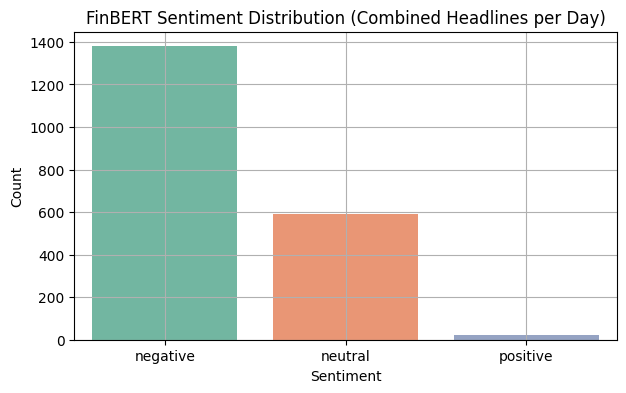

In [50]:
# Sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(data=merge, x='FinBERT_Label', palette='Set2')
plt.title("FinBERT Sentiment Distribution (Combined Headlines per Day)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [51]:
# Cross-tab: FinBERT Sentiment vs DJIA Up/Down
pd.crosstab(merge['FinBERT_Label'], merge['Label'], rownames=['FinBERT'], colnames=['DJIA Movement (Label)'])


DJIA Movement (Label),0,1
FinBERT,,
negative,639,740
neutral,277,312
positive,8,13


GENERATING SENTENCE EMBEDDINGS USING TRANSFORMERS + CLUSTERING

In [52]:
!pip install sentence-transformers
!pip install scikit-learn matplotlib seaborn


In [53]:
from sentence_transformers import SentenceTransformer

# Load pretrained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Apply on Combined_News
sentences = merge['Combined_News'].tolist()
embeddings = model.encode(sentences, show_progress_bar=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reduce to 2D for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
reduced = tsne.fit_transform(embeddings)

# Create DataFrame for plotting
embedding_df = pd.DataFrame(reduced, columns=['Dim1', 'Dim2'])
embedding_df['Label'] = merge['Label'].values  # 0 = down, 1 = up


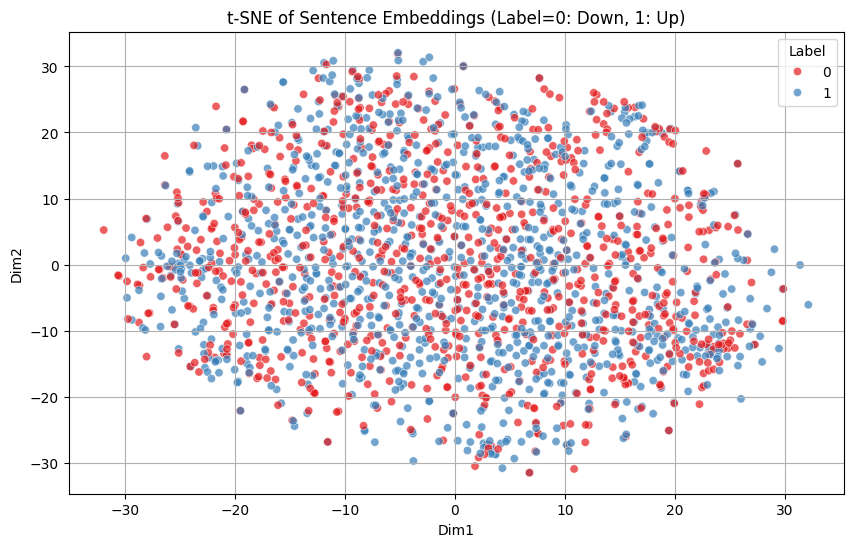

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=embedding_df, x='Dim1', y='Dim2', hue='Label', palette='Set1', alpha=0.7)
plt.title("t-SNE of Sentence Embeddings (Label=0: Down, 1: Up)")
plt.grid(True)
plt.show()


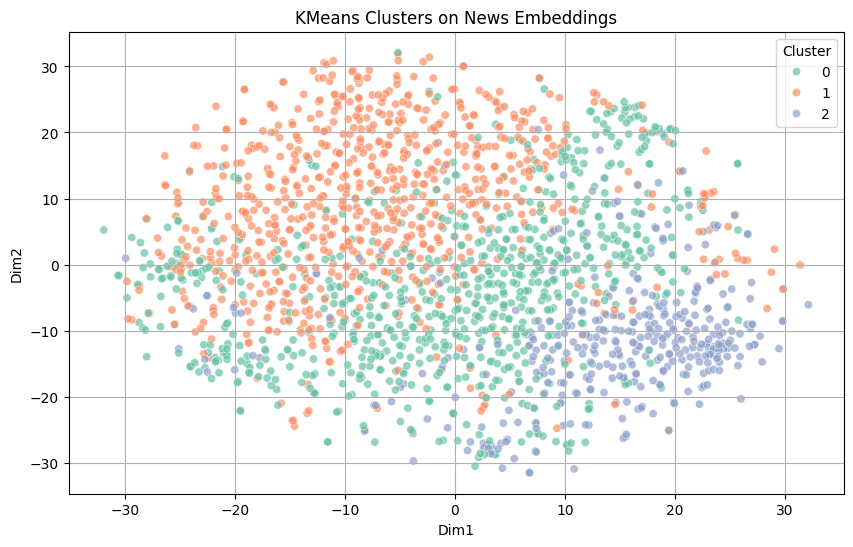

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
embedding_df['Cluster'] = kmeans.fit_predict(embeddings)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=embedding_df, x='Dim1', y='Dim2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title("KMeans Clusters on News Embeddings")
plt.grid(True)
plt.show()
